# Sport Vouchers Program Analysis

The goal of this Portfolio is to explore data from the Federal Government Sport Vouchers program - this is a
program that provides up to two $100 vouchers for kids to participate in organised sport. Here's the [NSW Active Kids page](https://www.service.nsw.gov.au/transaction/apply-active-kids-voucher), there are similar schemes in other states - this data is from South Australia.

This is an exercise in exploring data and communicating the insights you can gain from it.  The source data comes
from the `data.gov.au` website and provides details of all Sport Vouchers that have been redeemed since February in SA 2015 as part of the Sport Voucher program: [Sports Vouchers Data](https://data.gov.au/dataset/ds-sa-14daba50-04ff-46c6-8468-9fa593b9f100/details).

The augmentation of this data makes use of [ABS SEIFA data by LGA](http://stat.data.abs.gov.au/Index.aspx?DataSetCode=ABS_SEIFA_LGA#) which shows a few measures of Socioeconomic Advantage and Disadvantage for every Local Government Area. This data is provided as `ABS_SEIFA_LGA.csv`. This enables questions about whether the voucher program is used equally by parents in low, middle and high socioeconomic areas. This is a point of interest whether people are concerned that this kind of program might just benefit parents who are already advantaged (they might already be paying for sport so this program wouldn't be helping much).

This displays a useful summary of the data given that there are a large number of LGAs and sports involved. The usage of plots and tables are able to communicate the main points of my findings. 


In [263]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Basic Data Analysis
These datasets provide a basic perspective on how comprehensive and in-depth these questions will be answered with detail and precision of data. They involve simple usage of fields that are later going to transform into a more cohesive and informed version, utilising the same description. Thereby, this introduces the basic components of modelling datasets and supporting that data with intricate information to describe perfectly how this data coalesces.

In [264]:
# read the sports vouchers data
sa_vouchers = pd.read_csv("files/sportsvouchersclaimed.csv")
sa_vouchers.head()

,Participant_ID,Participant_Suburb,Club_Previous_Member,Participant_ATSI_Indicator,Participant_CALD_Indicator,Participant_Sex,Voucher_Value,Club_Name,Voucher_Sport,Participant_LGA,Participant_Electorate,Voucher_Completion_Date,Voucher_Claim_Year
0,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,26/6/15 1:19,2015
1,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,29/6/16 23:55,2016
2,1000004,ABERFOYLE PARK,Not Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,21/4/16 3:37,2016
3,1000004,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,30/3/17 0:47,2017
4,1000005,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Blackwood Community Recreation Association,Gymnastics,ONKAPARINGA,FISHER,20/7/15 2:50,2015


The SEIFA data includes row for each Local Government Area (LGA) but the names of the LGAs have a letter or letters in brackets after the name.  To allow us to match this up with the voucher data we remove this and convert to uppercase. 

For each LGA the data includes a number of measures that is useful in data exploration.  

In [265]:
seifa = pd.read_csv('files/ABS_SEIFA_LGA.csv')
seifa

,LGA_2011,Local Government Areas - 2011,INDEX_TYPE,Index Type,MEASURE,Measure,Value
0,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,SCORE,Score,967
1,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,MINS,Minimum score for SA1s in area,628
2,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,MAXS,Maximum score for SA1s in area,1169
3,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,URP,Usual resident population,47851
4,10110,Armidale Dumaresq (A),IRSAD,Index of Relative Socio-economic Advantage and...,SCORE,Score,985
...,...,...,...,...,...,...,...
9019,79399,Unincorporated NT,IEO,Index of Education and Occupation,URP,Usual resident population,7982
9020,89399,Unincorporated ACT,IEO,Index of Education and Occupation,SCORE,Score,1051
9021,89399,Unincorporated ACT,IEO,Index of Education and Occupation,MINS,Minimum score for SA1s in area,569
9022,89399,Unincorporated ACT,IEO,Index of Education and Occupation,MAXS,Maximum score for SA1s in area,1263


In [266]:
# read the SEIFA data, create an LGA column by removing the letters in brackets and converting to uppercase
seifa = pd.read_csv('files/ABS_SEIFA_LGA.csv')
lga = seifa["Local Government Areas - 2011"].str.replace(' \([ACSRCDMT]+\)', '').str.upper()
seifa['LGA'] = lga
seifa.head()

<ipython-input-266-8c32cb05a179>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  lga = seifa["Local Government Areas - 2011"].str.replace(' \([ACSRCDMT]+\)', '').str.upper()


,LGA_2011,Local Government Areas - 2011,INDEX_TYPE,Index Type,MEASURE,Measure,Value,LGA
0,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,SCORE,Score,967,ALBURY
1,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,MINS,Minimum score for SA1s in area,628,ALBURY
2,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,MAXS,Maximum score for SA1s in area,1169,ALBURY
3,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,URP,Usual resident population,47851,ALBURY
4,10110,Armidale Dumaresq (A),IRSAD,Index of Relative Socio-economic Advantage and...,SCORE,Score,985,ARMIDALE DUMARESQ


In [267]:
seifa['INDEX_TYPE'].unique()

array(['IRSAD', 'IRSD', 'IER', 'IEO'], dtype=object)

In [268]:
seifa['INDEX_TYPE'].head()

0    IRSAD
1    IRSAD
2    IRSAD
3    IRSAD
4    IRSAD
Name: INDEX_TYPE, dtype: object

Since there are many rows per LGA we need to use `pivot_table` to create a new data frame with one row per LGA. Here
is an example of doing this to create a table with the different SCORE measures and the population (URP) field. 

In [269]:
LGA_scores.head()

Voucher_Value
Participant_LGA Voucher_Claim_Year               
ADELAIDE        2015                           99
                2016                          136
                2017                           67
ADELAIDE HILLS  2015                         1814
                2016                         2111

In [270]:
LGA_scores['Population'] = LGA_pop.IEO
LGA_scores.head()

Voucher_Value  Population
Participant_LGA Voucher_Claim_Year                           
ADELAIDE        2015                           99         NaN
                2016                          136         NaN
                2017                           67         NaN
ADELAIDE HILLS  2015                         1814         NaN
                2016                         2111         NaN

In [271]:
LGA_scores = seifa[seifa.MEASURE == 'SCORE'].pivot_table(index="LGA", columns=["INDEX_TYPE"], values="Value")
LGA_scores.head()

INDEX_TYPE,IEO,IER,IRSAD,IRSD
LGA,,,,
ADELAIDE,874.0,874.0,1036.0,1013.0
ADELAIDE HILLS,1083.0,1083.0,1077.0,1081.0
ALBANY,999.0,999.0,977.0,987.0
ALBURY,964.0,964.0,967.0,979.0
ALEXANDRINA,1000.0,1000.0,969.0,987.0


In [272]:
LGA_scores = seifa[seifa.MEASURE == 'SCORE'].pivot_table(index="LGA", columns=["INDEX_TYPE"], values="Value")
LGA_scores.head()
LGA_pop = seifa[seifa.MEASURE == 'URP'].pivot_table(index="LGA", columns=["INDEX_TYPE"], values="Value")
LGA_scores['Population'] = LGA_pop.IEO
LGA_scores.head()

INDEX_TYPE,IEO,IER,IRSAD,IRSD,Population
LGA,,,,,
ADELAIDE,874.0,874.0,1036.0,1013.0,19606.0
ADELAIDE HILLS,1083.0,1083.0,1077.0,1081.0,38601.0
ALBANY,999.0,999.0,977.0,987.0,33614.0
ALBURY,964.0,964.0,967.0,979.0,47851.0
ALEXANDRINA,1000.0,1000.0,969.0,987.0,23693.0


In [273]:
LGA_scores['Population'] = LGA_pop.IEO
LGA_scores.head()

INDEX_TYPE,IEO,IER,IRSAD,IRSD,Population
LGA,,,,,
ADELAIDE,874.0,874.0,1036.0,1013.0,19606.0
ADELAIDE HILLS,1083.0,1083.0,1077.0,1081.0,38601.0
ALBANY,999.0,999.0,977.0,987.0,33614.0
ALBURY,964.0,964.0,967.0,979.0,47851.0
ALEXANDRINA,1000.0,1000.0,969.0,987.0,23693.0


<AxesSubplot:ylabel='Frequency'>

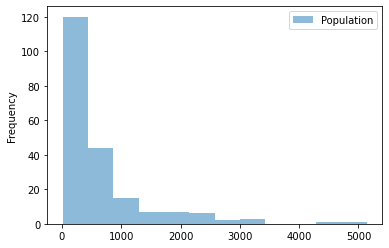

In [274]:
seifa = pd.DataFrame({'Population': sa_vouchers_scores_group.size()}) 
seifa.plot.hist(bins = 12, alpha = 0.5) 

array([<AxesSubplot:xlabel='Participant_LGA,Voucher_Claim_Year'>],
      dtype=object)

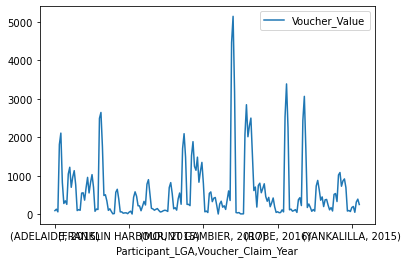

In [275]:
LGA_scores = pd.DataFrame({'Voucher_Value': sa_vouchers_scores_group.size()}) 
LGA_scores.plot.line(subplots = True)

This data frame can then be joined with the vouchers data fram to create one master data frame containing both the voucher data and the SEIFA measures.

In [319]:
sa_vouchers_scores = sa_vouchers.join(LGA_scores, on='Participant_LGA')
sa_vouchers_scores.head()

,Participant_ID,Participant_Suburb,Club_Previous_Member,Participant_ATSI_Indicator,Participant_CALD_Indicator,Participant_Sex,Voucher_Value,Club_Name,Voucher_Sport,Participant_LGA,Participant_Electorate,Voucher_Completion_Date,Voucher_Claim_Year,SCORE,Population
0,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,26/6/15 1:19,2015,990.0,159517.0
1,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,29/6/16 23:55,2016,990.0,159517.0
2,1000004,ABERFOYLE PARK,Not Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,21/4/16 3:37,2016,990.0,159517.0
3,1000004,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,30/3/17 0:47,2017,990.0,159517.0
4,1000005,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Blackwood Community Recreation Association,Gymnastics,ONKAPARINGA,FISHER,20/7/15 2:50,2015,990.0,159517.0


In [277]:
sa_LGA 

count
Participant_LGA Voucher_Claim_Year       
ADELAIDE        2015                   99
                2016                  136
                2017                   67
ADELAIDE HILLS  2015                 1814
                2016                 2111
...                                   ...
YANKALILLA      2016                  206
                2017                   56
YORKE PENINSULA 2015                  322
                2016                  397
                2017                  258

[206 rows x 1 columns]

In [278]:
sa_vouchers_scores_group = sa_vouchers_scores.groupby('Participant_LGA')
#for key, item in sa_vouchers_scores_group:
 #   print(item)

In [279]:
sa_vouchers_scores_group.size()

Participant_LGA
ADELAIDE            302
ADELAIDE HILLS     4756
ADELAIDE PLAINS     899
ALEXANDRINA        2979
BAROSSA            2874
                   ... 
WEST TORRENS       2844
WHYALLA            2488
WUDINNA             267
YANKALILLA          443
YORKE PENINSULA     977
Length: 69, dtype: int64

In [280]:
sa_LGA = pd.DataFrame({'count': sa_vouchers_scores_group.size()})
sa_LGA

,count
Participant_LGA,
ADELAIDE,302
ADELAIDE HILLS,4756
ADELAIDE PLAINS,899
ALEXANDRINA,2979
BAROSSA,2874
...,...
WEST TORRENS,2844
WHYALLA,2488
WUDINNA,267


In [281]:
sa_LGA['count_percent'] = sa_LGA['count'] / sa_LGA['count'].sum()
sa_LGA

,count,count_percent
Participant_LGA,,
ADELAIDE,302,0.002368
ADELAIDE HILLS,4756,0.037294
ADELAIDE PLAINS,899,0.007050
ALEXANDRINA,2979,0.023360
BAROSSA,2874,0.022537
...,...,...
WEST TORRENS,2844,0.022301
WHYALLA,2488,0.019510
WUDINNA,267,0.002094


In [320]:
sa_LGA = sa_LGA.join(LGA_scores['Population'], on = 'Participant_LGA')
sa_LGA

count  Population
Participant_LGA Voucher_Claim_Year                   
ADELAIDE        2015                   99     19606.0
                2016                  136     19606.0
                2017                   67     19606.0
ADELAIDE HILLS  2015                 1814     38601.0
                2016                 2111     38601.0
...                                   ...         ...
YANKALILLA      2016                  206      4406.0
                2017                   56      4406.0
YORKE PENINSULA 2015                  322     11046.0
                2016                  397     11046.0
                2017                  258     11046.0

[206 rows x 2 columns]

In [ ]:
sa_LGA = sa_LGA.join(LGA_scores['IEO'], on = 'Participant_LGA')
sa_LGA

In [322]:
sa_LGA['Population_percent'] = sa_LGA['count'] / sa_LGA['Population']
sa_LGA

count  Population  Population_percent
Participant_LGA Voucher_Claim_Year                                       
ADELAIDE        2015                   99     19606.0            0.005049
                2016                  136     19606.0            0.006937
                2017                   67     19606.0            0.003417
ADELAIDE HILLS  2015                 1814     38601.0            0.046994
                2016                 2111     38601.0            0.054688
...                                   ...         ...                 ...
YANKALILLA      2016                  206      4406.0            0.046754
                2017                   56      4406.0            0.012710
YORKE PENINSULA 2015                  322     11046.0            0.029151
                2016                  397     11046.0            0.035941
                2017                  258     11046.0            0.023357

[206 rows x 3 columns]

In [323]:
LGA_pop = seifa[seifa.MEASURE == 'URP'].pivot_table(index = "LGA", columns = ["INDEX_TYPE"], values = "Value")
LGA_pop.head()

INDEX_TYPE,IEO,IER,IRSAD,IRSD
LGA,,,,
ADELAIDE,19606.0,19606.0,19606.0,19606.0
ADELAIDE HILLS,38601.0,38601.0,38601.0,38601.0
ALBANY,33614.0,33614.0,33614.0,33614.0
ALBURY,47851.0,47851.0,47851.0,47851.0
ALEXANDRINA,23693.0,23693.0,23693.0,23693.0


In [286]:
sa_LGA.index 

Index(['ADELAIDE', 'ADELAIDE HILLS', 'ADELAIDE PLAINS', 'ALEXANDRINA',
       'BAROSSA', 'BARUNGA WEST', 'BERRI BARMERA', 'BURNSIDE', 'CAMPBELLTOWN',
       'CEDUNA', 'CHARLES STURT', 'CLARE AND GILBERT VALLEYS', 'CLEVE',
       'COOBER PEDY', 'COPPER COAST', 'ELLISTON', 'FLINDERS RANGES',
       'FRANKLIN HARBOUR', 'GAWLER', 'GOYDER', 'GRANT', 'HOLDFAST BAY',
       'KANGAROO ISLAND', 'KAROONDA EAST MURRAY', 'KIMBA', 'KINGSTON', 'LIGHT',
       'LOWER EYRE PENINSULA', 'LOXTON WAIKERIE', 'MARION', 'MID MURRAY',
       'MITCHAM', 'MOUNT BARKER', 'MOUNT GAMBIER', 'MOUNT REMARKABLE',
       'MURRAY BRIDGE', 'NARACOORTE LUCINDALE', 'NO LGA', 'NORTHERN AREAS',
       'NORWOOD PAYNEHAM AND ST PETERS', 'ONKAPARINGA', 'ORROROO/CARRIETON',
       'PETERBOROUGH', 'PLAYFORD', 'PORT ADELAIDE ENFIELD', 'PORT AUGUSTA',
       'PORT LINCOLN', 'PORT PIRIE', 'PROSPECT', 'RENMARK PARINGA', 'ROBE',
       'ROXBY DOWNS', 'SALISBURY', 'SOUTHERN MALLEE', 'STREAKY BAY', 'TATIARA',
       'TEA TREE GULLY', 'T

In [287]:
sa_vouchers_scores_group = sa_vouchers_scores.groupby(['Participant_LGA', 'Voucher_Claim_Year'])
sa_LGA = pd.DataFrame({'count': sa_vouchers_scores_group.size()})
sa_LGA

count
Participant_LGA Voucher_Claim_Year       
ADELAIDE        2015                   99
                2016                  136
                2017                   67
ADELAIDE HILLS  2015                 1814
                2016                 2111
...                                   ...
YANKALILLA      2016                  206
                2017                   56
YORKE PENINSULA 2015                  322
                2016                  397
                2017                  258

[206 rows x 1 columns]

In [288]:
sa_LGA.xs(2015, level = 'Voucher_Claim_Year')

,count
Participant_LGA,
ADELAIDE,99
ADELAIDE HILLS,1814
ADELAIDE PLAINS,284
ALEXANDRINA,1050
BAROSSA,970
...,...
WEST TORRENS,1024
WHYALLA,870
WUDINNA,88


In [324]:
lga = seifa["Local Government Areas - 2011"].str.replace(' \([ACSRCDMT]+\)', '').str.upper()
seifa['LGA'] = lga
seifa.head()

<ipython-input-324-82c84bc46bf9>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  lga = seifa["Local Government Areas - 2011"].str.replace(' \([ACSRCDMT]+\)', '').str.upper()


,LGA_2011,Local Government Areas - 2011,INDEX_TYPE,Index Type,MEASURE,Measure,Value,LGA
0,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,SCORE,Score,967,ALBURY
1,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,MINS,Minimum score for SA1s in area,628,ALBURY
2,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,MAXS,Maximum score for SA1s in area,1169,ALBURY
3,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,URP,Usual resident population,47851,ALBURY
4,10110,Armidale Dumaresq (A),IRSAD,Index of Relative Socio-economic Advantage and...,SCORE,Score,985,ARMIDALE DUMARESQ


Text(0, 0.5, 'region')

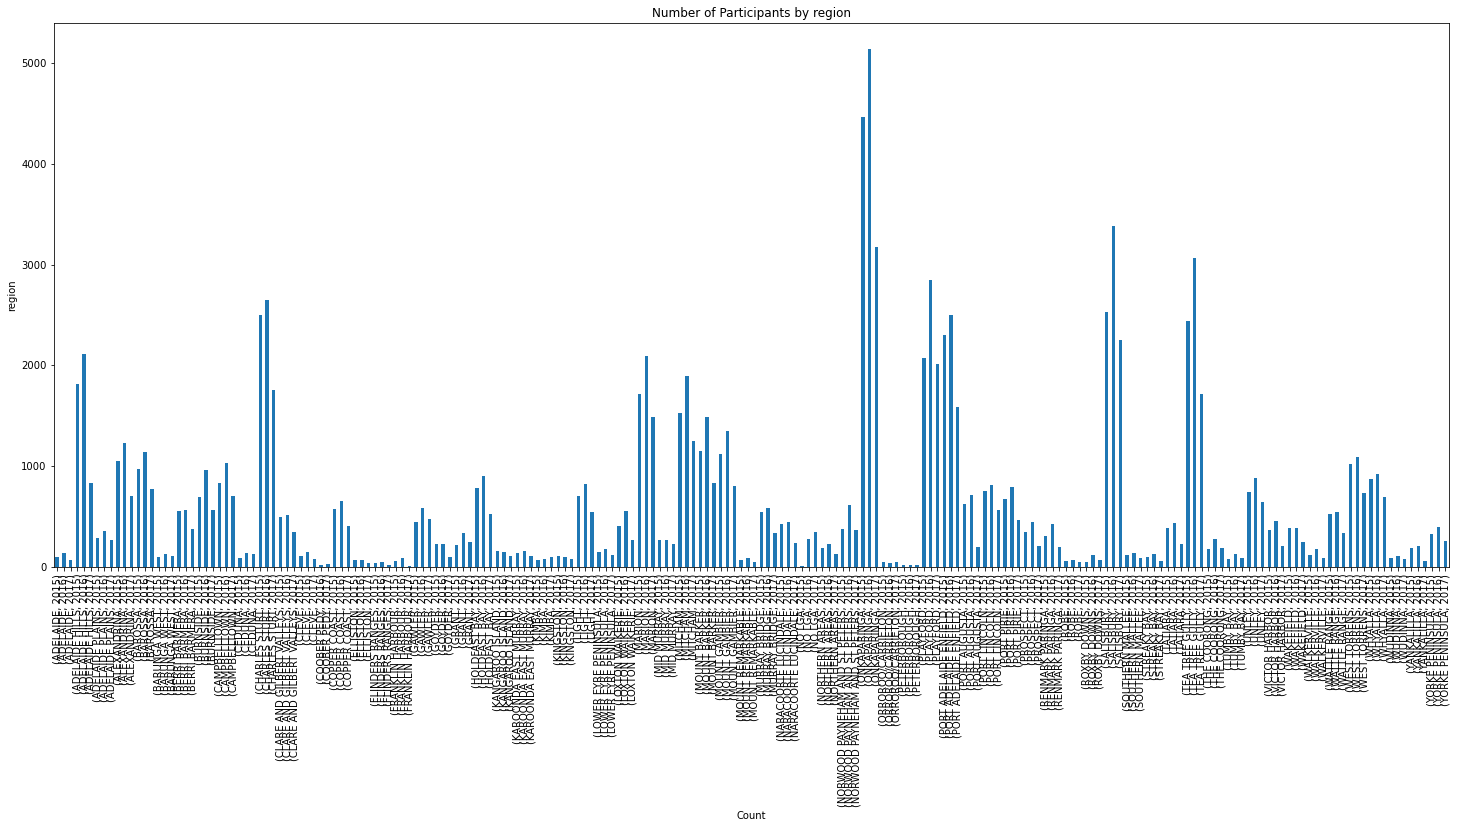

In [290]:
i = sa_LGA.plot(kind = 'bar', legend = None, title = "Number of Participants by region", figsize = (25, 10))
i.set_xlabel("Count")
i.set_ylabel("region")

### *Description of Distribution*
The analysis of this data indicates patterns and trends within datasets to properly discern and locate distributions. It determines the values of variables and quantifies relative frequency, thereby transforming raw data into graphical methods to give valuable information. It specifically processes the information of data significantly standing out.

Displaying the percentages of voucher usage by Participant_LGA and Voucher_Sport. *LGA range = 10.023054 - 2.720230 = 7.302824* 

In [291]:
df = pd.DataFrame({'count': sa_vouchers.groupby(['Participant_LGA']).size()})
df['Percentage'] = 100 * df['count'] / df['count'].sum()
df.sort_values('count', ascending = False).head(10)

,count,Percentage
Participant_LGA,,
ONKAPARINGA,12782,10.023054
SALISBURY,8169,6.405753
TEA TREE GULLY,7219,5.660806
PLAYFORD,6940,5.442028
CHARLES STURT,6897,5.408309
PORT ADELAIDE ENFIELD,6384,5.006038
MARION,5291,4.148958
ADELAIDE HILLS,4756,3.729436
MITCHAM,4662,3.655725


In [292]:
df = pd.DataFrame({'count': sa_vouchers.groupby(['Voucher_Sport']).size()})
df['Percentage'] = 100 * df['count'] / df['count'].sum()
df.sort_values('count', ascending = False).head(10)

,count,Percentage
Voucher_Sport,,
Australian Rules,47224,37.030880
Netball,24017,18.833022
Football (Soccer),15775,12.370027
Gymnastics,9823,7.702743
Basketball,6016,4.717469
Athletics,4518,3.542807
Tennis,3742,2.934304
Hockey,3026,2.372849
Calisthenics,2522,1.977636


This graph displays a positive skew distribution and analyses the plot distribution of vouchers by LGA. 

<AxesSubplot:>

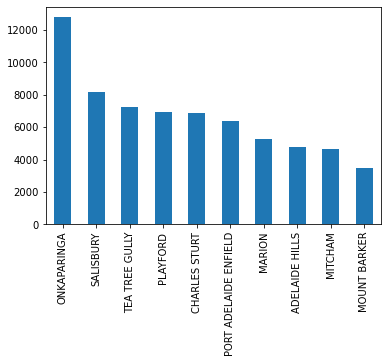

In [293]:
sa_vouchers['Participant_LGA'].value_counts()[:10].plot(kind = 'bar')

This graph displays a positive skew distribution and analyses the plot distribution of vouchers by Sport. 

<AxesSubplot:>

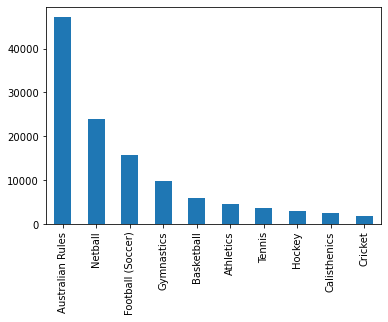

In [294]:
sa_vouchers['Voucher_Sport'].value_counts()[:10].plot(kind = 'bar')

### *Essential Difference in Data Analysis*
Exploring different data types is a way of investigating a difference in patterns and data conclusion. It is an informative process to sometimes compare different description fields to emphasise outliers in both fields. In this case, this data will be discovering the mode or the most common statistic within the data and the specifc location wherein it lies.

In [295]:
df = pd.DataFrame({'count': sa_vouchers.groupby(['Participant_LGA','Voucher_Sport']).size()})
df['percent vouchers'] = 100 * df['count'] / df['count'].sum()
df = df.sort_values('count', ascending = False)
df = df.reset_index(level = ['Participant_LGA', 'Voucher_Sport'])
df

,Participant_LGA,Voucher_Sport,count,percent vouchers
0,ONKAPARINGA,Australian Rules,5258,4.123081
1,SALISBURY,Australian Rules,2856,2.239543
2,PLAYFORD,Australian Rules,2580,2.023117
3,PORT ADELAIDE ENFIELD,Australian Rules,2453,1.923529
4,MARION,Australian Rules,2362,1.852171
...,...,...,...,...
1152,RENMARK PARINGA,Equestrian,1,0.000784
1153,HOLDFAST BAY,Touch,1,0.000784
1154,TEA TREE GULLY,Pony Clubs,1,0.000784
1155,ADELAIDE PLAINS,Surf Lifesaving,1,0.000784


In [296]:
df = df[df['Voucher_Sport'] != 'Australian Rules']
df

,Participant_LGA,Voucher_Sport,count,percent vouchers
5,ONKAPARINGA,Netball,2242,1.758073
8,SALISBURY,Football (Soccer),2069,1.622414
10,PLAYFORD,Football (Soccer),1880,1.474209
13,ADELAIDE HILLS,Netball,1395,1.093895
14,TEA TREE GULLY,Football (Soccer),1356,1.063313
...,...,...,...,...
1152,RENMARK PARINGA,Equestrian,1,0.000784
1153,HOLDFAST BAY,Touch,1,0.000784
1154,TEA TREE GULLY,Pony Clubs,1,0.000784
1155,ADELAIDE PLAINS,Surf Lifesaving,1,0.000784


Asessing the difference between the types of graphs discloses the emphasis of data it is trying to portray. The Sport bar graph displays a healthy distribution and the LGA pie graph also displays somewhat equal sectors.

<AxesSubplot:>

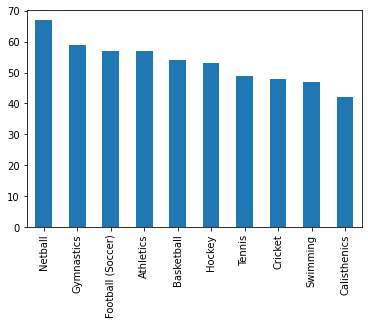

In [297]:
df['Voucher_Sport'].value_counts()[:10].plot(kind = 'bar')

<AxesSubplot:ylabel='Participant_LGA'>

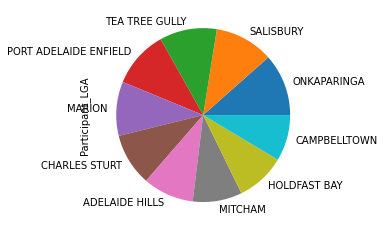

In [298]:
df['Participant_LGA'].value_counts()[:10].plot(kind = 'pie')

### *Crucial Dataset Representation*
Data Representation refers to the form in which data is stored, processed, and how it is visually transmitted. This denotes the significant representation of LGA and their vouchers use and particularly views noticeable differences between the datasets.

These datasets will specifcally discern outliers primarily to uncover the data that is over or under represented. They will also importantly figure out the main focus of the question.

In [299]:
df = pd.DataFrame({'count': sa_vouchers.groupby(['Participant_Electorate']).size()})
df['percent vouchers'] = (100 * df['count']) / df['count'].sum()
df['Participant_Electorate'] = df.index
df.sort_values('count', ascending = False)

,count,percent vouchers,Participant_Electorate
Participant_Electorate,,,
HEYSEN,6066,4.756677,HEYSEN
FROME,4445,3.485564,FROME
SCHUBERT,4252,3.334222,SCHUBERT
FLINDERS,4242,3.326381,FLINDERS
MACKILLOP,4195,3.289525,MACKILLOP
CHAFFEY,4167,3.267569,CHAFFEY
LITTLE PARA,4123,3.233066,LITTLE PARA
MOUNT GAMBIER,4066,3.188369,MOUNT GAMBIER
GOYDER,3592,2.816681,GOYDER


This boxplot displays the outlier in different type of graph other than a histogram, bar or pie plot. This shows the variety of graphs that can properly display the main focus of data.

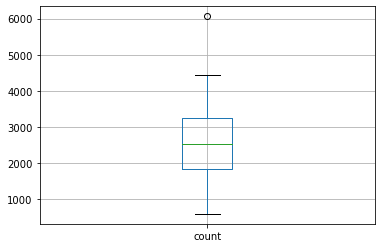

In [300]:
bp = df.boxplot(column = ['count'])

In [301]:
df.describe()

,count,percent vouchers
count,48.000000,48.000000
mean,2656.791667,2.083333
std,1089.177456,0.854083
min,595.000000,0.466572
25%,1846.500000,1.447940
50%,2521.500000,1.977244
75%,3253.750000,2.551440
max,6066.000000,4.756677


An interquartile range can decipher whether data types are over or under represented within the dataset.

In [302]:
quartile_one = df.quantile(0.25)
quartile_three = df.quantile(0.75)
inter_quartile_range = quartile_three - quartile_one
lower_threshold = quartile_one - 1.5 * inter_quartile_range
higher_threshold = quartile_three + 1.5 * inter_quartile_range
df['Outlier'] = np.where((df['count'] > float(lower_threshold[0])) & (df['count'] < float(higher_threshold[0])) , False , True)
df

,count,percent vouchers,Participant_Electorate,Outlier
Participant_Electorate,,,,
ADELAIDE,1574,1.234258,ADELAIDE,False
ASHFORD,2566,2.012139,ASHFORD,False
BRAGG,2211,1.733764,BRAGG,False
BRIGHT,2701,2.117999,BRIGHT,False
CHAFFEY,4167,3.267569,CHAFFEY,False
CHELTENHAM,2547,1.997240,CHELTENHAM,False
COLTON,2074,1.626335,COLTON,False
CROYDON,1707,1.338551,CROYDON,False
DAVENPORT,2427,1.903141,DAVENPORT,False


This views a certain outlier in the data which correlates to the question whether the specific data is over represented or under represented. The particpant is over represented in this data.

In [303]:
df [df['Outlier'] == True]

,count,percent vouchers,Participant_Electorate,Outlier
Participant_Electorate,,,,
HEYSEN,6066,4.756677,HEYSEN,True


### *Data Field Relationships*
A data field relationship contextually describes the existance of relational data and is utilised to be compared or analysed together. Predetermined data types collectively stores data in different locations, while linking disparate data items. The relationship between SEIFA measures and voucher use in an LGA will prophesise the question to whether there is a proper correlation and therefore specific relationship between the datasets.

In [304]:
seifa = pd.read_csv('files/ABS_SEIFA_LGA.csv')
lga = seifa["Local Government Areas - 2011"].str.replace(' \([ACSRCDMT]+\)', '',regex = True).str.upper()
seifa['LGA'] = lga
seifa.head()

,LGA_2011,Local Government Areas - 2011,INDEX_TYPE,Index Type,MEASURE,Measure,Value,LGA
0,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,SCORE,Score,967,ALBURY
1,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,MINS,Minimum score for SA1s in area,628,ALBURY
2,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,MAXS,Maximum score for SA1s in area,1169,ALBURY
3,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,URP,Usual resident population,47851,ALBURY
4,10110,Armidale Dumaresq (A),IRSAD,Index of Relative Socio-economic Advantage and...,SCORE,Score,985,ARMIDALE DUMARESQ


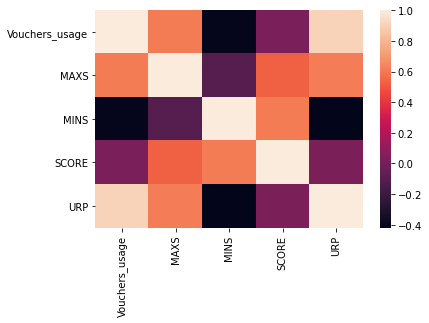

In [305]:
corr = df_merge.corr()
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(corr)
plt.show()

In [306]:
LGA_scores = seifa.pivot_table(index = "LGA", columns = ["MEASURE"], values = "Value")
LGA_scores

MEASURE,MAXS,MINS,SCORE,URP
LGA,,,,
ADELAIDE,1082.50,759.25,949.25,19606.0
ADELAIDE HILLS,1151.25,952.50,1081.00,38601.0
ALBANY,1149.50,773.75,990.50,33614.0
ALBURY,1179.75,621.75,968.50,47851.0
ALEXANDRINA,1089.50,835.75,989.00,23693.0
...,...,...,...,...
YASS VALLEY,1207.75,923.50,1075.25,15025.0
YILGARN,1066.75,926.25,987.25,1642.0
YORK,1063.50,929.25,994.50,3379.0


In [307]:
d1 = pd.DataFrame({'Vouchers_usage': sa_vouchers.groupby(['Participant_LGA']).size()})
d1

,Vouchers_usage
Participant_LGA,
ADELAIDE,302
ADELAIDE HILLS,4756
ADELAIDE PLAINS,899
ALEXANDRINA,2979
BAROSSA,2874
...,...
WEST TORRENS,2844
WHYALLA,2488
WUDINNA,267


These datasets show there is a relationship between SEIFA measures and voucher use in LGA, evidently displaying an obvious correlation.

In [308]:
df_merge = d1.join(LGA_scores)

In [309]:
df_merge.corr()

,Vouchers_usage,MAXS,MINS,SCORE,URP
Vouchers_usage,1.000000,0.610706,-0.405156,0.020602,0.909829
MAXS,0.610706,1.000000,-0.098153,0.524806,0.614668
MINS,-0.405156,-0.098153,1.000000,0.608846,-0.418858
SCORE,0.020602,0.524806,0.608846,1.000000,0.026571
URP,0.909829,0.614668,-0.418858,0.026571,1.000000


## Challenge - Queensland

_Note: this is an extra task that you might take on to get a better grade for your portfolio.  You can get a good pass grade without doing this._ 

Queensland has a similar program called [Get Started](https://data.gov.au/dataset/ds-qld-3118838a-d425-48fa-bfc9-bc615ddae44e/details?q=get%20started%20vouchers) and we can retrieve data from their program in a similar format.  

The file [round1-redeemed_get_started_vouchers.csv](files/round1-redeemed_get_started_vouchers.csv) contains records of the vouchers issued in Queensland. The date of this data is not included but the program started in 2015 so it is probably from around then.  

The data includes the LGA of the individual but the name of the activity is slightly different.  To do a comparable analysis you would need to map the activity names onto those from South Australia. 

In [310]:
qld_vouchers = pd.read_csv('files/round1-redeemed_get_started_vouchers.csv')
qld_vouchers.head()

,Application Number,Voucher Number,Child Age (at time of Application),Gender,Has your child played sport before?,Participation Activity,Club Name,Club Suburb/Town,Club Local Government Area Name,Club State Electoral District Name,Parent Suburb/Town,Total Payment
0,2000012253,Q89QDUXP,10,NaN,Yes,*Other,Queensland Police-Citizens Youth Welfare Assoc...,Airlie Beach,Whitsunday (R),Whitsunday,Jubilee Pocket,60.01
1,2000001727,593F6Y41,5,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Leichhardt,150.00
2,2000013464,PH2R4RTT,5,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Woodridge,150.00
3,2000009270,035SE2H5,5,NaN,Yes,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Yatala,150.00
4,2000007273,NP6C4729,6,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Alexandra Hills,150.00


In [311]:
# Join the QLD data with the LGA data as before to get population and SIEFA data integrated
qld_vouchers['LGA'] = qld_vouchers['Club Local Government Area Name'].str.replace(' \([RC]+\)', '').str.upper()
qld_vouchers_scores = qld_vouchers.join(LGA_scores, on = 'LGA')
qld_vouchers_scores.head()

<ipython-input-311-82c584587e25>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  qld_vouchers['LGA'] = qld_vouchers['Club Local Government Area Name'].str.replace(' \([RC]+\)', '').str.upper()


,Application Number,Voucher Number,Child Age (at time of Application),Gender,Has your child played sport before?,Participation Activity,Club Name,Club Suburb/Town,Club Local Government Area Name,Club State Electoral District Name,Parent Suburb/Town,Total Payment,LGA,MAXS,MINS,SCORE,URP
0,2000012253,Q89QDUXP,10,NaN,Yes,*Other,Queensland Police-Citizens Youth Welfare Assoc...,Airlie Beach,Whitsunday (R),Whitsunday,Jubilee Pocket,60.01,WHITSUNDAY,1119.00,814.00,981.50,31393.0
1,2000001727,593F6Y41,5,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Leichhardt,150.00,BRISBANE,1222.25,536.75,1035.25,1042074.0
2,2000013464,PH2R4RTT,5,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Woodridge,150.00,BRISBANE,1222.25,536.75,1035.25,1042074.0
3,2000009270,035SE2H5,5,NaN,Yes,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Yatala,150.00,BRISBANE,1222.25,536.75,1035.25,1042074.0
4,2000007273,NP6C4729,6,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Alexandra Hills,150.00,BRISBANE,1222.25,536.75,1035.25,1042074.0


In [312]:
seifa = pd.read_csv('files/ABS_SEIFA_LGA.csv')
lga = seifa["Local Government Areas - 2011"].str.replace(' \([ACSRCDMT]+\)', '', regex = True).str.upper()
seifa['LGA'] = lga
seifa.head()

,LGA_2011,Local Government Areas - 2011,INDEX_TYPE,Index Type,MEASURE,Measure,Value,LGA
0,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,SCORE,Score,967,ALBURY
1,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,MINS,Minimum score for SA1s in area,628,ALBURY
2,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,MAXS,Maximum score for SA1s in area,1169,ALBURY
3,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,URP,Usual resident population,47851,ALBURY
4,10110,Armidale Dumaresq (A),IRSAD,Index of Relative Socio-economic Advantage and...,SCORE,Score,985,ARMIDALE DUMARESQ


In [313]:
qld_vouchers = pd.read_csv('files/round1-redeemed_get_started_vouchers.csv')
qld_vouchers

,Application Number,Voucher Number,Child Age (at time of Application),Gender,Has your child played sport before?,Participation Activity,Club Name,Club Suburb/Town,Club Local Government Area Name,Club State Electoral District Name,Parent Suburb/Town,Total Payment
0,2000012253,Q89QDUXP,10,NaN,Yes,*Other,Queensland Police-Citizens Youth Welfare Assoc...,Airlie Beach,Whitsunday (R),Whitsunday,Jubilee Pocket,60.01
1,2000001727,593F6Y41,5,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Leichhardt,150.00
2,2000013464,PH2R4RTT,5,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Woodridge,150.00
3,2000009270,035SE2H5,5,NaN,Yes,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Yatala,150.00
4,2000007273,NP6C4729,6,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Alexandra Hills,150.00
...,...,...,...,...,...,...,...,...,...,...,...,...
9502,2000006794,6NNE0C7G,5,NaN,No,Zen Do Kai Martial Arts,Queensland Police Citizens Youth Welfare Assoc...,Hervey Bay,Fraser Coast (R),Hervey Bay,Point Vernon,150.00
9503,2000006793,RTO92U6N,6,NaN,No,Zen Do Kai Martial Arts,Queensland Police Citizens Youth Welfare Assoc...,Hervey Bay,Fraser Coast (R),Hervey Bay,Point Vernon,150.00
9504,2000006797,X77J5N6X,13,NaN,No,Zen Do Kai Martial Arts,Queensland Police Citizens Youth Welfare Assoc...,Hervey Bay,Fraser Coast (R),Hervey Bay,Point Vernon,150.00
9505,2000006810,Y2U1FBEF,15,NaN,No,Zen Do Kai Martial Arts,Queensland Police Citizens Youth Welfare Assoc...,Hervey Bay,Fraser Coast (R),Hervey Bay,Point Vernon,150.00


In [314]:
qld_vouchers['LGA'] = qld_vouchers['Club Local Government Area Name'].str.replace(' \([RC]+\)', '', regex = True).str.upper()
qld_vouchers

,Application Number,Voucher Number,Child Age (at time of Application),Gender,Has your child played sport before?,Participation Activity,Club Name,Club Suburb/Town,Club Local Government Area Name,Club State Electoral District Name,Parent Suburb/Town,Total Payment,LGA
0,2000012253,Q89QDUXP,10,NaN,Yes,*Other,Queensland Police-Citizens Youth Welfare Assoc...,Airlie Beach,Whitsunday (R),Whitsunday,Jubilee Pocket,60.01,WHITSUNDAY
1,2000001727,593F6Y41,5,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Leichhardt,150.00,BRISBANE
2,2000013464,PH2R4RTT,5,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Woodridge,150.00,BRISBANE
3,2000009270,035SE2H5,5,NaN,Yes,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Yatala,150.00,BRISBANE
4,2000007273,NP6C4729,6,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Alexandra Hills,150.00,BRISBANE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9502,2000006794,6NNE0C7G,5,NaN,No,Zen Do Kai Martial Arts,Queensland Police Citizens Youth Welfare Assoc...,Hervey Bay,Fraser Coast (R),Hervey Bay,Point Vernon,150.00,FRASER COAST
9503,2000006793,RTO92U6N,6,NaN,No,Zen Do Kai Martial Arts,Queensland Police Citizens Youth Welfare Assoc...,Hervey Bay,Fraser Coast (R),Hervey Bay,Point Vernon,150.00,FRASER COAST
9504,2000006797,X77J5N6X,13,NaN,No,Zen Do Kai Martial Arts,Queensland Police Citizens Youth Welfare Assoc...,Hervey Bay,Fraser Coast (R),Hervey Bay,Point Vernon,150.00,FRASER COAST
9505,2000006810,Y2U1FBEF,15,NaN,No,Zen Do Kai Martial Arts,Queensland Police Citizens Youth Welfare Assoc...,Hervey Bay,Fraser Coast (R),Hervey Bay,Point Vernon,150.00,FRASER COAST


In [315]:
LGA_scores = seifa[seifa.MEASURE == 'SCORE'].pivot_table(index = "LGA", columns = ["MEASURE"], values = "Value")
LGA_scores.head()
LGA_pop = seifa[seifa.MEASURE == 'URP'].pivot_table(index = "LGA", columns = ["INDEX_TYPE"], values = "Value")
LGA_scores['Population'] = LGA_pop.IEO
LGA_scores.head()

MEASURE,SCORE,Population
LGA,,
ADELAIDE,949.25,19606.0
ADELAIDE HILLS,1081.00,38601.0
ALBANY,990.50,33614.0
ALBURY,968.50,47851.0
ALEXANDRINA,989.00,23693.0


In [316]:
qld_vouchers_scores = qld_vouchers.join(LGA_scores, on = 'LGA')
qld_vouchers_scores.head()

,Application Number,Voucher Number,Child Age (at time of Application),Gender,Has your child played sport before?,Participation Activity,Club Name,Club Suburb/Town,Club Local Government Area Name,Club State Electoral District Name,Parent Suburb/Town,Total Payment,LGA,SCORE,Population
0,2000012253,Q89QDUXP,10,NaN,Yes,*Other,Queensland Police-Citizens Youth Welfare Assoc...,Airlie Beach,Whitsunday (R),Whitsunday,Jubilee Pocket,60.01,WHITSUNDAY,981.50,31393.0
1,2000001727,593F6Y41,5,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Leichhardt,150.00,BRISBANE,1035.25,1042074.0
2,2000013464,PH2R4RTT,5,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Woodridge,150.00,BRISBANE,1035.25,1042074.0
3,2000009270,035SE2H5,5,NaN,Yes,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Yatala,150.00,BRISBANE,1035.25,1042074.0
4,2000007273,NP6C4729,6,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Alexandra Hills,150.00,BRISBANE,1035.25,1042074.0


In [317]:
qld_vouchers_scores['Participation Activity'].value_counts()

Rugby League           2782
Football (Soccer)      2074
Netball                1263
Australian Football     548
Gymnastics              539
                       ... 
Ice Hockey                1
Cycling                   1
Futsal                    1
Broomball                 1
T-Ball                    1
Name: Participation Activity, Length: 66, dtype: int64

In [318]:
qld_vouchers['Participation Activity'].unique()

array(['*Other', 'Archery', 'Athletics', 'Australian Football',
       'Baseball', 'Basketball', 'BMX Bicycle Motocross', 'Body Boarding',
       'Bowls Lawn', 'Boxing', 'Broomball', 'Bushwalking', 'Calisthenics',
       'Canoeing Outrigger', 'Cheerleading', 'Cricket', 'Cycling',
       'Dancesport', 'Disability Sports', 'Dragon Boating', 'Equestrian',
       'Football (Soccer)', 'Futsal', 'Golf', 'Gymnastics', 'Hockey',
       'Ice Hockey', 'Ice Skating', 'Inline Hockey', 'Ju Jitsu', 'Judo',
       'Karate', 'Karting', 'Kayaking', 'Life Saving Surf',
       'Mixed Martial Arts', 'Motor Cycling', 'Netball', 'Oztag',
       'Parkour', 'Polocrosse', 'Pony Club', 'Riding for the Disabled',
       'Rock Climbing', 'Roller Sports', 'Rowing', 'Rugby League',
       'Rugby Union', 'Sailing', 'Shooting', 'Skipping', 'Softball',
       'Squash', 'Surfing', 'Swimming', 'Swimming Synchronised',
       'Table Tennis', 'Taekwondo', 'T-Ball', 'Tennis', 'Tenpin Bowling',
       'Touch', 'Trail Bike R